# model 2



In [1]:
# Packages

import sys
import os
# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))
# Import module
from XGBoost_Functions import *
# Model name
model_name = 'smote_rating_change_model_2'
import json

In [2]:
# Load the data
df = load_data()

In [3]:
# Get the column names and mapping
numeric_feature_columns, cat_feature_columns, target_column, custom_mapping = get_column_names_and_mapping_change(model_name)

In [4]:
# Create matrices
X_train_scaled, X_test_scaled, y_train, y_test, _ = prepare_matrices(df, numeric_feature_columns, cat_feature_columns, target_column, custom_mapping, change=False)


feature names: 
['num__EBIT' 'num__common_plus_preferred_stock' 'num__workingCapital'
 'num__Ratio_A' 'num__Ratio_B' 'num__Ratio_C' 'num__Ratio_D'
 'num__Ratio_E' 'num__cashAndCashEquivalents' 'num__shortTermInvestments'
 'num__cashAndShortTermInvestments' 'num__netReceivables'
 'num__inventory_balance_sheet' 'num__otherCurrentAssets'
 'num__totalCurrentAssets' 'num__propertyPlantEquipmentNet'
 'num__goodwill' 'num__intangibleAssets'
 'num__goodwillAndIntangibleAssets' 'num__longTermInvestments'
 'num__taxAssets' 'num__otherNonCurrentAssets'
 'num__totalNonCurrentAssets' 'num__otherAssets' 'num__totalAssets'
 'num__accountPayables' 'num__shortTermDebt' 'num__taxPayables'
 'num__deferredRevenue' 'num__otherCurrentLiabilities'
 'num__totalCurrentLiabilities' 'num__longTermDebt'
 'num__deferredRevenueNonCurrent' 'num__deferredTaxLiabilitiesNonCurrent'
 'num__otherNonCurrentLiabilities' 'num__totalNonCurrentLiabilities'
 'num__otherLiabilities' 'num__capitalLeaseObligations'
 'num__totalLi

In [5]:
X_train_sm, y_train_sm = smote_sampling(X_train_scaled, y_train, 1000)

{0: 1000, 1: 4156, 2: 1000}


In [6]:
# Train model
best_model = train_model_with_grid_search(X_train_sm, y_train_sm, len(custom_mapping), model_name)

Tuned hyperparameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 10000, 'objective': 'multi:softprob'}
Train accuracy of best model:  1.0
Best mean CV accuracy: 0.9335696087016153


{'accuracy': 0.945438282647585, 'f1_score': 0.9280268962268191, 'majority_baseline': 0.9534883720930233}
Share of predictions exactly as the actual: 94.54%
Share of predictions 1 or fewer ratings away from actual: 99.73%


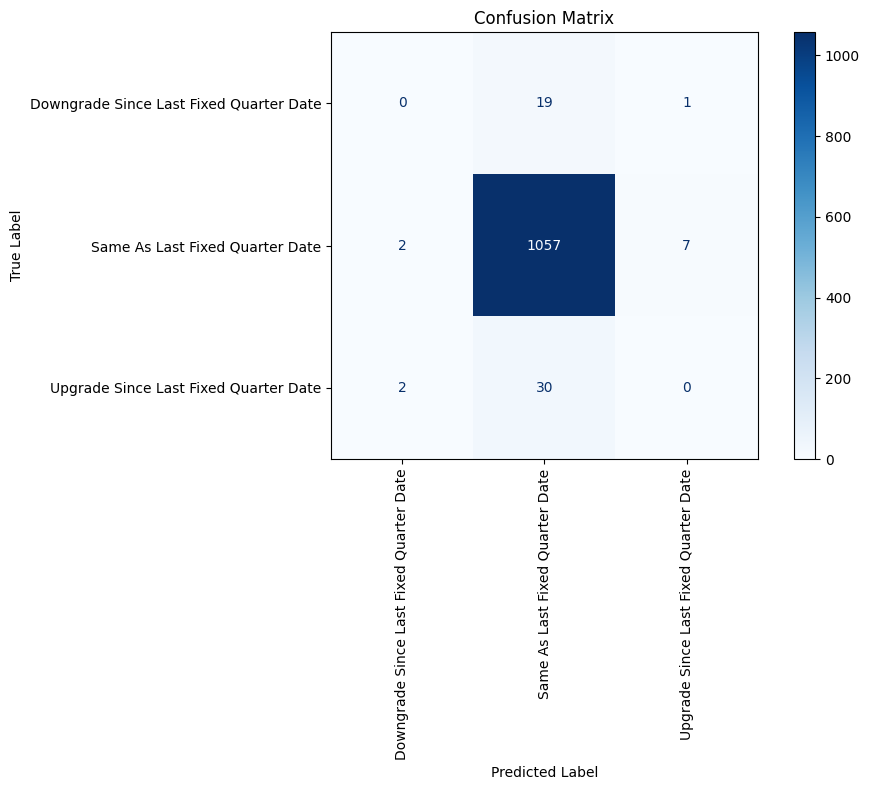

In [7]:
# Evaluate model
evaluate_model(best_model, X_test_scaled, y_test, custom_mapping,model_name)

In [8]:
# Get predictions
get_model_predictions(best_model, X_test_scaled, y_test, custom_mapping, model_name, target_column, df)

X_test_scaled shape
(1118, 155)
y_test shape
(1118,)
accuracy: 0.945438282647585
share of correct predictions: 0.945438282647585
assertion that they match:


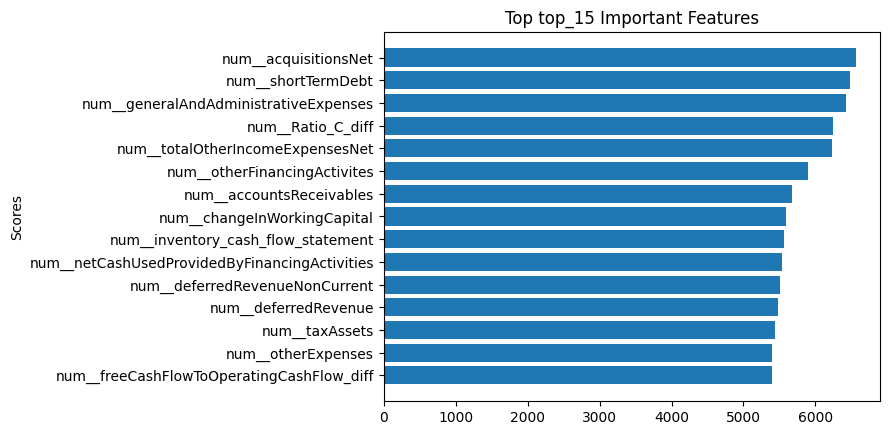

<Figure size 1500x2000 with 0 Axes>

In [9]:
# plot important features
plot_importance(best_model,_,model_name)